In [1]:
# Import libraries
import numpy as np
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn import model_selection
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import collections

# Other Libraries
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from IPython.display import display, HTML

sns.set(rc = {'figure.figsize':(15,8)})

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
# Check shape of the dataset
df.shape

(284807, 31)

# Exploratory Data Analysis

In [10]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

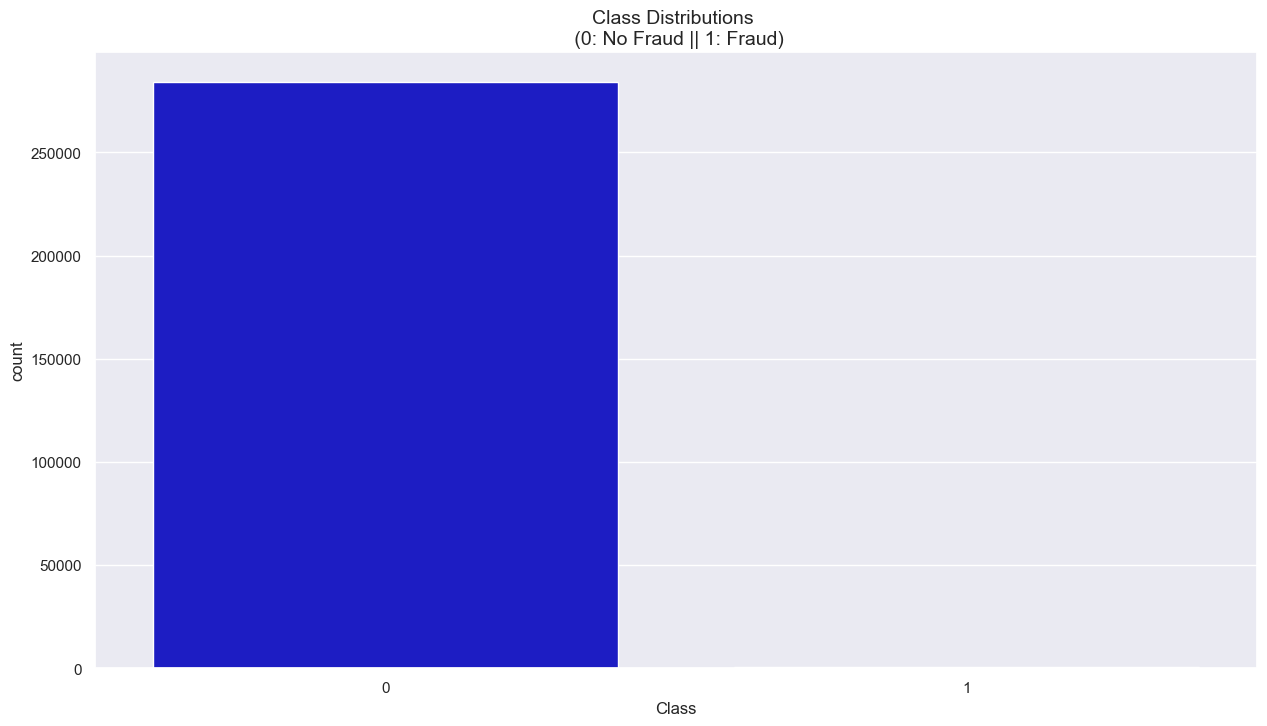

In [11]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(x = 'Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

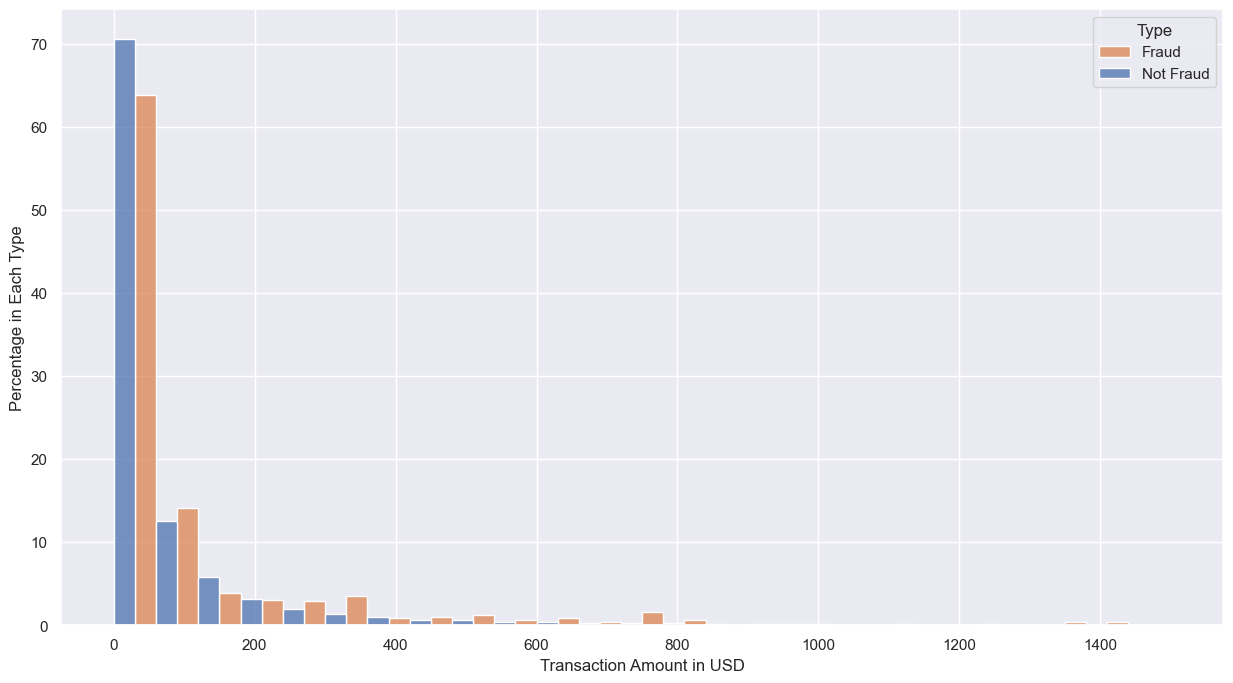

In [12]:
#amount vs fraud
ax=sns.histplot(x='Amount',data=df[df.Amount<=1500],hue='Class',stat='percent',multiple='dodge',common_norm=False,bins=25)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

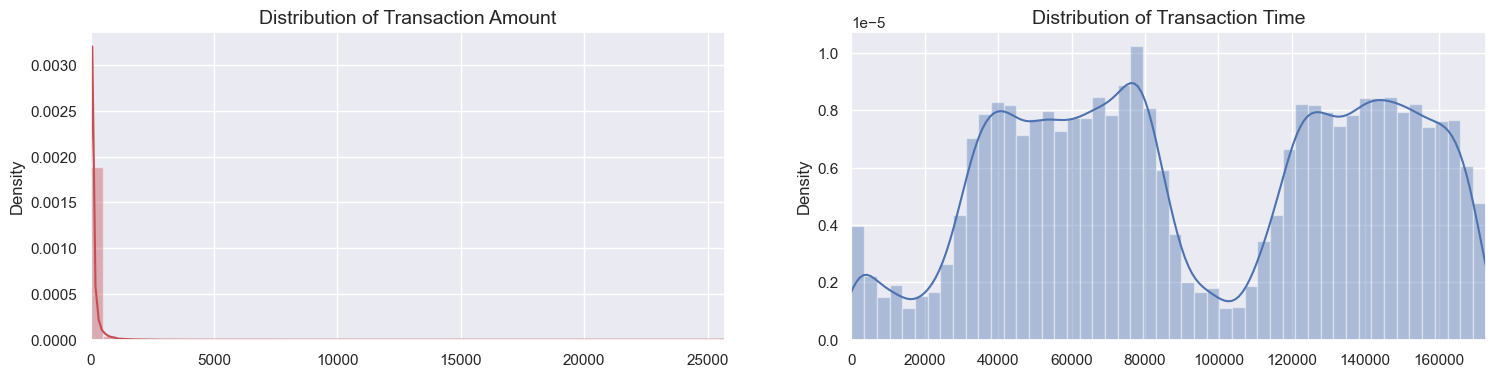

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

# Data Preprocessing

In [14]:
# Check Null Values
df.isna().sum()

# There is no null values in this dataset

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [15]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [16]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1, random_state=42)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
146884,2.054361,-0.122642,-1.245717,0.189567,0.132497,-0.620765,0.059581,-0.148058,0.338940,0.247959,...,-0.687048,0.271569,-0.497120,-0.270115,0.208619,-0.076075,-0.075428,0,-0.293579,0.038170
95597,-2.923827,1.524837,-3.018758,3.289291,-5.755542,2.218276,-0.509995,-3.569444,-1.016592,-4.320536,...,-0.122724,-4.288639,0.563797,-0.949451,-0.204532,1.510206,-0.324706,1,18.615944,-0.226824
96768,0.955253,-0.833374,0.847147,0.725970,-1.322868,-0.238842,-0.565347,0.022443,-0.762247,0.738315,...,-0.129397,-0.040892,0.364872,0.204756,-0.304578,0.055908,0.062489,0,1.872424,-0.220456
75511,-1.229669,1.956099,-0.851198,2.796987,-1.913977,-0.044934,-1.340739,-0.555548,-1.184468,-3.245109,...,0.277612,0.019266,0.508529,-0.201183,-0.249600,0.562239,0.075309,1,2.080905,-0.335930
255556,-0.242245,4.147186,-5.672349,6.493741,1.591168,-1.602523,-0.950463,0.722903,-4.128505,-3.963224,...,-0.480286,-0.286080,-1.153575,-0.035571,0.559628,0.409446,0.221048,1,-0.296653,0.852830


In [17]:
new_df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,-2.371988,1.768357,-3.532150,2.244208,-1.577901,-0.711669,-2.783314,0.288724,-1.283937,-2.837455,...,-0.021163,-0.021029,-0.061700,0.036807,0.030667,0.083928,0.034827,0.500000,1.165716,0.027889
std,5.575374,3.785805,6.216390,3.202674,4.253686,1.776005,5.866466,4.850236,2.322747,4.535412,...,1.169971,1.187246,0.567426,0.654856,0.474967,1.020935,0.445134,0.500254,3.576194,0.559773
min,-30.552380,-25.831782,-31.103685,-3.228317,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,-24.588262,...,-8.887017,-19.254328,-2.221543,-4.781606,-1.193749,-7.263482,-2.765070,0.000000,-0.307413,-0.990214
25%,-2.867222,-0.125707,-5.084967,-0.157596,-1.758911,-1.572363,-3.078361,-0.195111,-2.324444,-4.572043,...,-0.564798,-0.239519,-0.405859,-0.301713,-0.283741,-0.064802,-0.058337,0.000000,-0.293440,-0.460074
50%,-0.758846,0.944286,-1.356585,1.204850,-0.453246,-0.652649,-0.616593,0.140210,-0.697102,-0.868217,...,-0.017102,-0.037683,-0.004995,0.085693,-0.010091,0.034186,0.031850,0.500000,-0.077482,-0.068122
75%,1.085902,2.814114,0.324032,4.276079,0.475120,0.000034,0.233779,0.876841,0.179333,0.029812,...,0.541215,0.191100,0.354562,0.395486,0.331217,0.466568,0.221151,1.000000,1.089779,0.576748
max,2.319584,22.057729,2.849420,12.114672,11.095089,13.085694,17.256623,20.007208,5.509988,8.457899,...,8.361985,5.466230,1.249015,2.208209,2.745261,6.267709,2.440756,1.000000,48.628659,1.022968


In [18]:
new_df.shape

(984, 31)

Distribution of the Classes in the subsample dataset
Class
0    0.5
1    0.5
Name: count, dtype: float64


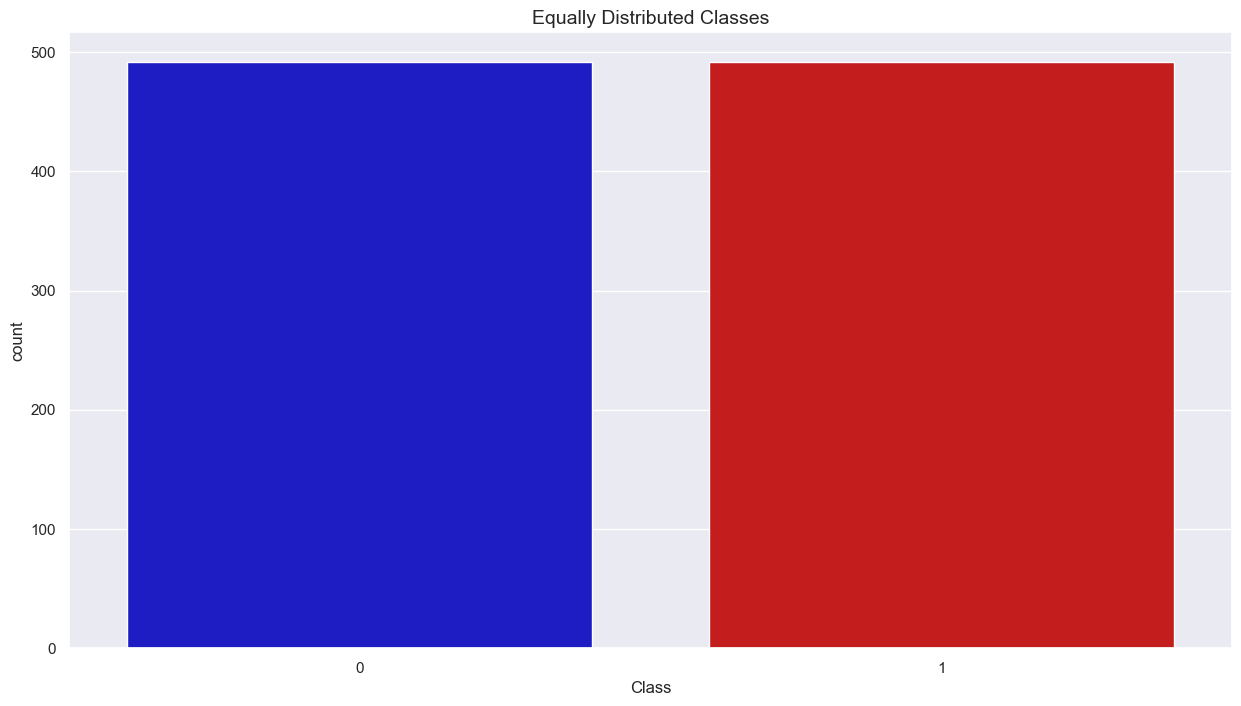

In [19]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot(x='Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

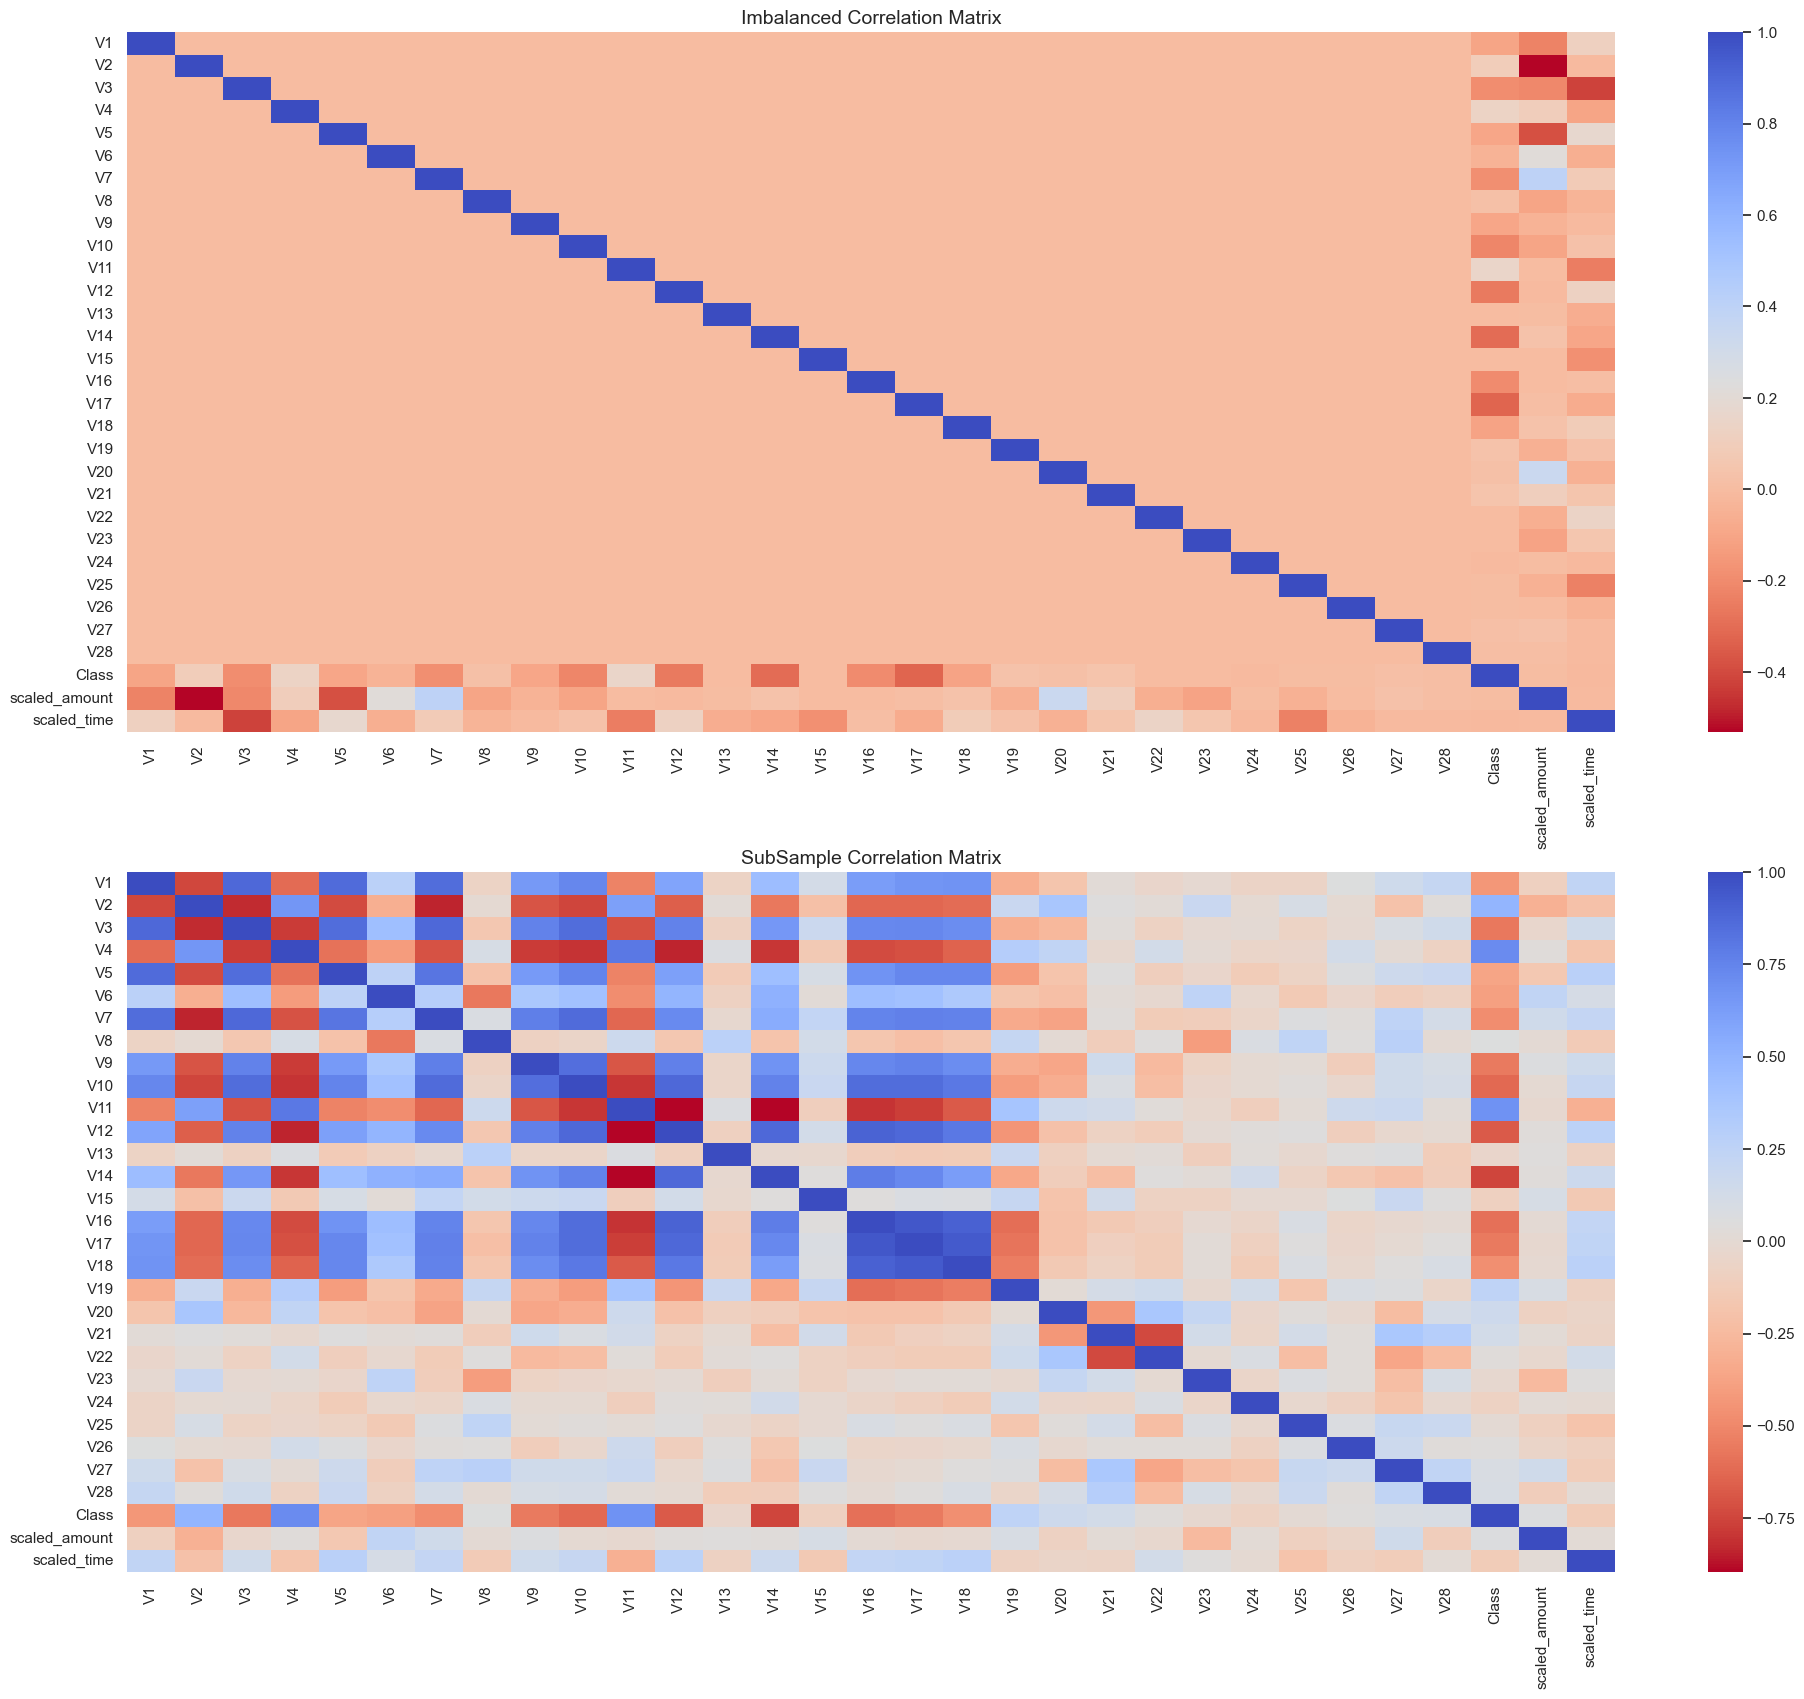

In [20]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix', fontsize=14)
plt.show()

# Machine Learning

In [21]:
# Undersampling before cross validating (prone to overfit)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [22]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [24]:
# Let's implement simple classifiers
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "Support Vector Classifier": SVC(),
    "RandomForestClassifier": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

In [25]:
# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score

final_results = []
all_classifier = []
all_ypred = []

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "has a training score of", round(training_score.mean() * 100, 2), "% accuracy score")
    final_results.append(round(training_score.mean() * 100, 2))
    all_classifier.append(classifier)
    all_ypred.append(y_pred)

Classifiers:  LogisticRegression has a training score of 94.54 % accuracy score
Classifiers:  SVC has a training score of 93.77 % accuracy score
Classifiers:  RandomForestClassifier has a training score of 94.41 % accuracy score
Classifiers:  XGBClassifier has a training score of 94.41 % accuracy score
Classifiers:  AdaBoostClassifier has a training score of 93.4 % accuracy score


# ADA + LR

In [60]:
# create the sub-models
estimators = []

#Defining Logistic Regression Models
model11 = LogisticRegression(penalty = 'l2', random_state = 42)
estimators.append(('logistic1', model11))

# Defining AdaBoost
model31 = AdaBoostClassifier(n_estimators=40, learning_rate=1, random_state=42)
estimators.append(('ada1', model31))

In [61]:
# Defining the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)

In [62]:
#Cross-Validation
kfold = model_selection.StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
results = model_selection.cross_val_score(ensemble, X_train, y_train, cv=kfold)
results = round(results.mean() * 100, 2)
print(results, "%")

94.41 %


# ADA + RF

In [63]:
# create the sub-models
estimators = []

# Defining Random Forest Classifiers
model20 = RandomForestClassifier(max_depth=10, random_state=42)
estimators.append(('cart5', model20))

# Defining AdaBoost
model31 = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=42)
estimators.append(('ada1', model31))

In [64]:
# Defining the ensemble model
ensemble2 = VotingClassifier(estimators)
ensemble2.fit(X_train, y_train)
y_pred2 = ensemble2.predict(X_test)

In [65]:
# Cross-Validation
kfold = model_selection.StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
results2 = model_selection.cross_val_score(ensemble2, X_train, y_train, cv=kfold)
results2 = round(results2.mean() * 100, 2)
print(results2, "%")

94.79 %


# ADA + SVC

In [66]:
# create the sub-models
estimators = []

# Defining Support Vector Classifiers
model21 = SVC(kernel = 'linear')
estimators.append(('svm1', model21))
# model22 = SVC(kernel = 'poly')
# estimators.append(('svm2', model22))
# model23 = SVC(kernel = 'rbf')
# estimators.append(('svm3', model23))

# Defining AdaBoost
model31 = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=42)
estimators.append(('ada1', model31))

In [67]:
# Defining the ensemble model
ensemble3 = VotingClassifier(estimators)
ensemble3.fit(X_train, y_train)
y_pred3 = ensemble3.predict(X_test)

In [68]:
# Cross-Validation
kfold = model_selection.StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
results3 = model_selection.cross_val_score(ensemble3, X_train, y_train, cv=kfold)
results3 = round(results3.mean() * 100, 2)
print(results3, "%")

94.79 %


# ADA + XGB

In [69]:
# create the sub-models
estimators = []

# Defining AdaBoost
model33 = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=42)
estimators.append(('ada3', model33))
                  
#Defining XGBoost
model26 = XGBClassifier()
estimators.append(('xgb1', model26))

In [70]:
# Defining the ensemble model
ensemble4 = VotingClassifier(estimators)
ensemble4.fit(X_train, y_train)
y_pred4 = ensemble4.predict(X_test)

In [71]:
# Cross-Validation
kfold = model_selection.StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
results4 = model_selection.cross_val_score(ensemble4, X_train, y_train, cv=kfold)
results4 = round(results4.mean() * 100, 2)
print(results4, "%")

95.05 %


# Accuracy Comparision

In [72]:
final_results_hybrid = np.array([results, results3, results2, results4])
final_results_hybrid

array([94.41, 94.79, 94.79, 95.05])

In [73]:
final_results_single = np.array(final_results)
final_results_single

array([94.54, 93.77, 94.41, 94.41, 93.4 ])

In [74]:
final_results_single_df = pd.DataFrame({'Accuracy':final_results_single}, index=classifiers)
final_results_single_df

,Accuracy
LogisiticRegression,94.54
Support Vector Classifier,93.77
RandomForestClassifier,94.41
XGBoost,94.41
AdaBoost,93.40


In [75]:
final_results_hybrid_df = pd.DataFrame({'Accuracy':final_results_hybrid}, index=list(["ADA + LR", "ADA + SVC", "ADA + RF", "ADA + XGB"]))
final_results_hybrid_df

,Accuracy
ADA + LR,94.41
ADA + SVC,94.79
ADA + RF,94.79
ADA + XGB,95.05


In [76]:
final_results_model = pd.concat([final_results_single_df, final_results_hybrid_df])
final_results_model

,Accuracy
LogisiticRegression,94.54
Support Vector Classifier,93.77
RandomForestClassifier,94.41
XGBoost,94.41
AdaBoost,93.40
ADA + LR,94.41
ADA + SVC,94.79
ADA + RF,94.79
ADA + XGB,95.05


# AUC and ROC

In [43]:
from sklearn.model_selection import cross_val_predict

# Create a DataFrame with all the scores and the classifiers names.
ada_lr_pred = cross_val_predict(ensemble, X_train, y_train, cv=5)
ada_rf_pred = cross_val_predict(ensemble2, X_train, y_train, cv=5)
ada_svc_pred = cross_val_predict(ensemble3, X_train, y_train, cv=5)
ada_xgb_pred = cross_val_predict(ensemble4, X_train, y_train, cv=5)


In [44]:
# Get AUC
ada_lr_auc = roc_auc_score(y_train, ada_lr_pred)
ada_rf_auc = roc_auc_score(y_train, ada_rf_pred)
ada_svc_auc = roc_auc_score(y_train, ada_svc_pred)
ada_xgb_auc = roc_auc_score(y_train, ada_xgb_pred)

print('AUC for ADA and LR set: %0.4f' % (ada_lr_auc * 100) + "%")
print('AUC for ADA and RF set: %0.4f' % (ada_rf_auc * 100) + "%")
print('AUC for ADA and SVC set: %0.4f' % (ada_svc_auc * 100) + "%")
print('AUC for ADA and XGB set: %0.4f' % (ada_xgb_auc * 100) + "%")

AUC for ADA and LR set: 94.4386%
AUC for ADA and RF set: 94.0460%
AUC for ADA and SVC set: 94.0534%
AUC for ADA and XGB set: 94.1768%


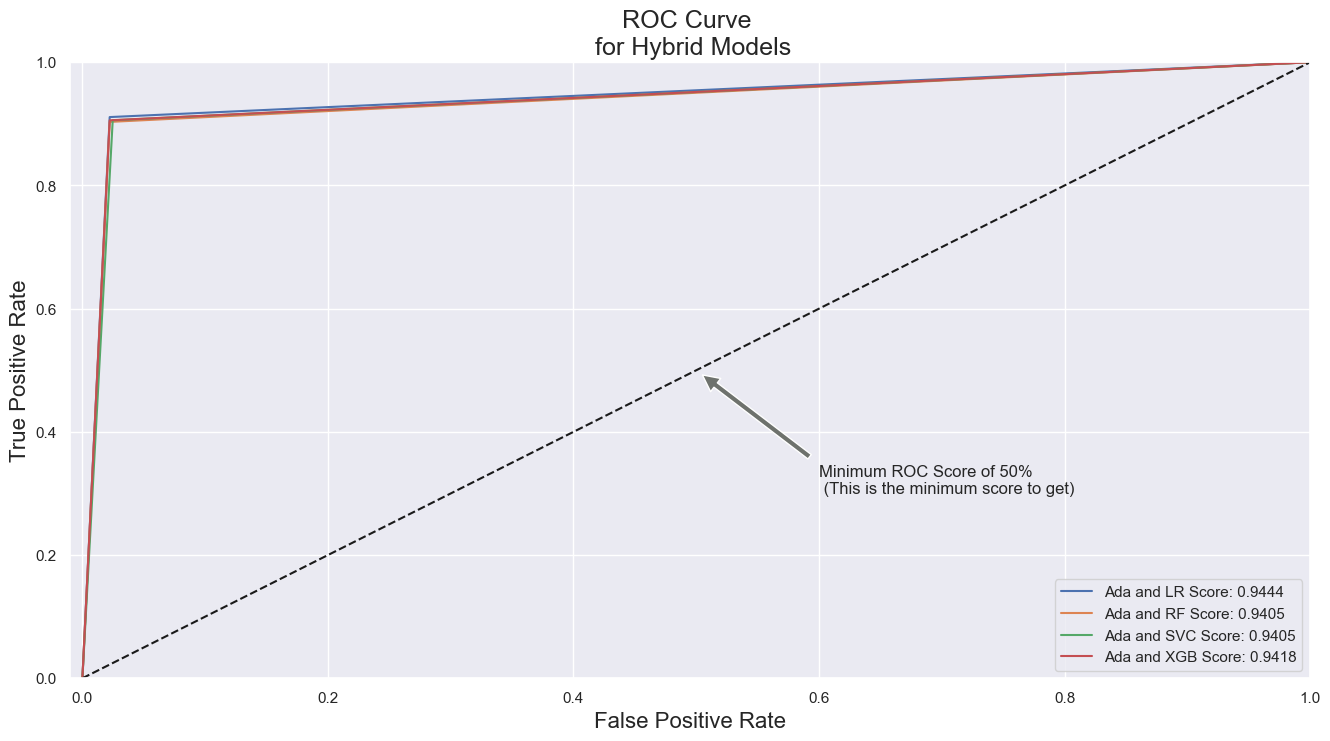

In [45]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, ada_lr_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, ada_rf_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, ada_svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, ada_xgb_pred)

def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n for Hybrid Models', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Ada and LR Score: {:.4f}'.format(roc_auc_score(y_train, ada_lr_pred)))
    plt.plot(knear_fpr, knear_tpr, label='Ada and RF Score: {:.4f}'.format(roc_auc_score(y_train, ada_rf_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Ada and SVC Score: {:.4f}'.format(roc_auc_score(y_train, ada_svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Ada and XGB Score: {:.4f}'.format(roc_auc_score(y_train, ada_xgb_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

In [46]:
# Create a DataFrame with all the scores and the classifiers names.
lr_pred = cross_val_predict(all_classifier[0], X_train, y_train, cv=5)
svc_pred = cross_val_predict(all_classifier[1], X_train, y_train, cv=5)
rf_pred = cross_val_predict(all_classifier[2], X_train, y_train, cv=5)
xgb_pred = cross_val_predict(all_classifier[3], X_train, y_train, cv=5)
ada_pred = cross_val_predict(all_classifier[4], X_train, y_train, cv=5)

In [47]:
lr_auc = roc_auc_score(y_train, lr_pred)
svc_auc = roc_auc_score(y_train, svc_pred)
rf_auc = roc_auc_score(y_train, rf_pred)
xgb_auc = roc_auc_score(y_train, xgb_pred)
ada_auc = roc_auc_score(y_train, ada_pred)

print('AUC for LR: %0.4f' % (lr_auc * 100) + "%")
print('AUC for SVC: %0.4f' % (svc_auc * 100) + "%")
print('AUC for RF: %0.4f' % (rf_auc * 100) + "%")
print('AUC for XGB: %0.4f' % (xgb_auc * 100) + "%")
print('AUC for ADA: %0.4f' % (ada_auc * 100) + "%")

AUC for LR: 94.4758%
AUC for SVC: 93.6310%
AUC for RF: 94.1843%
AUC for XGB: 94.3449%
AUC for ADA: 93.3424%


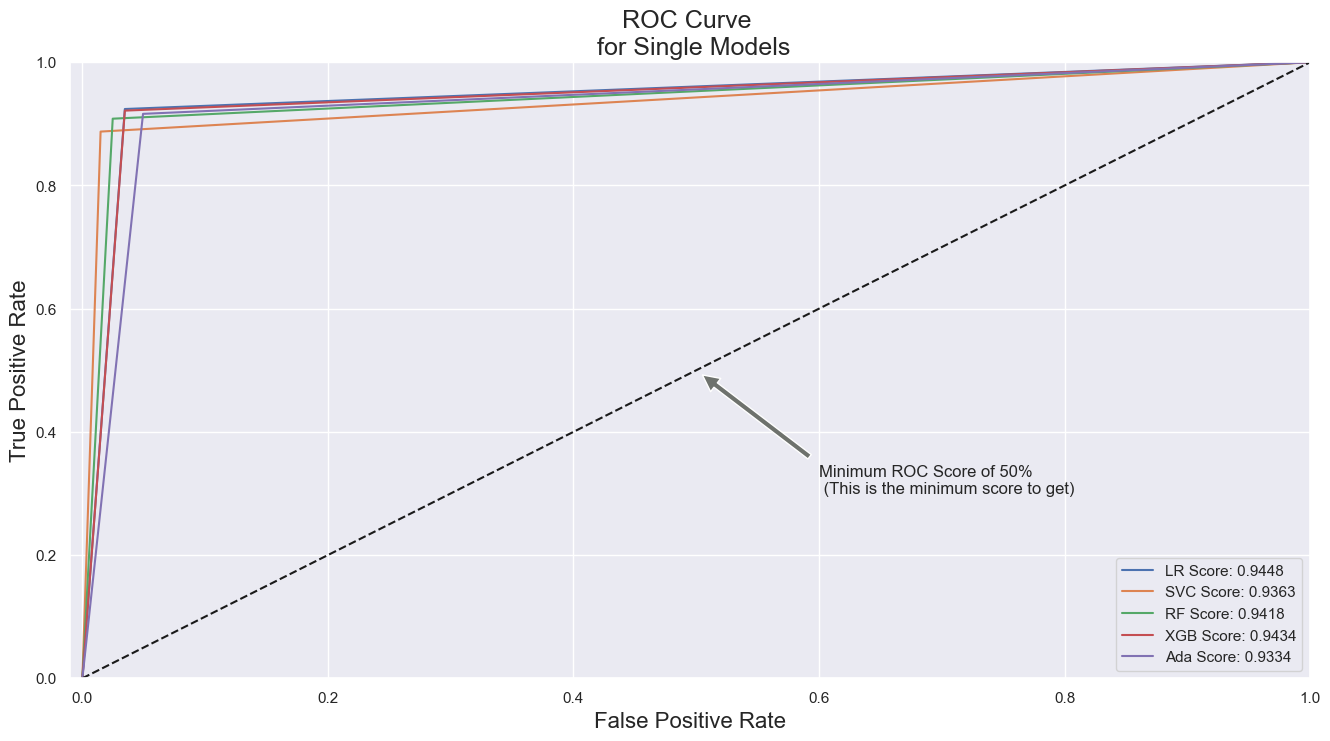

In [48]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, lr_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_train, rf_pred)
xgb_fpr, xgb_tpr, xgb_threshold = roc_curve(y_train, xgb_pred)
ada_fpr, ada_tpr, ada_threshold = roc_curve(y_train, ada_pred)

def graph_roc_curve_multiple(log_fpr, log_tpr, svc_fpr, svc_tpr, rf_fpr, rf_tpr, xgb_fpr, xgb_tpr, ada_fpr, ada_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n for Single Models', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='LR Score: {:.4f}'.format(roc_auc_score(y_train, lr_pred)))
    plt.plot(svc_fpr, svc_tpr, label='SVC Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(rf_fpr, rf_tpr, label='RF Score: {:.4f}'.format(roc_auc_score(y_train, rf_pred)))
    plt.plot(xgb_fpr, xgb_tpr, label='XGB Score: {:.4f}'.format(roc_auc_score(y_train, xgb_pred)))
    plt.plot(ada_fpr, ada_tpr, label='Ada Score: {:.4f}'.format(roc_auc_score(y_train, ada_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, svc_fpr, svc_tpr, rf_fpr, rf_tpr, xgb_fpr, xgb_tpr, ada_fpr, ada_tpr)
plt.show()

In [49]:
# ADA + LR
ada_lr_accuracy = accuracy_score(y_train, ada_lr_pred)
ada_lr_precision = precision_score(y_train, ada_lr_pred)
ada_lr_recall = recall_score(y_train, ada_lr_pred)
ada_lr_f1 = f1_score(y_train, ada_lr_pred)

print("ADA + LR")
print('Accuracy: %0.4f' % ada_lr_accuracy)
print('Precision: %0.4f' % ada_lr_precision)
print('Recall: %0.4f' % ada_lr_recall)
print('f1 Score: %0.4f' % ada_lr_f1)

print('\n')

# ADA + RF
ada_rf_accuracy = accuracy_score(y_train, ada_rf_pred)
ada_rf_precision = precision_score(y_train, ada_rf_pred)
ada_rf_recall = recall_score(y_train, ada_rf_pred)
ada_rf_f1 = f1_score(y_train, ada_rf_pred)

print("ADA + RF")
print('Accuracy: %0.4f' % ada_rf_accuracy)
print('Precision: %0.4f' % ada_rf_precision)
print('Recall: %0.4f' % ada_rf_recall)
print('f1 Score: %0.4f' % ada_rf_f1)

print('\n')

# ADA + SVC
ada_svc_accuracy = accuracy_score(y_train, ada_svc_pred)
ada_svc_precision = precision_score(y_train, ada_svc_pred)
ada_svc_recall = recall_score(y_train, ada_svc_pred)
ada_svc_f1 = f1_score(y_train, ada_svc_pred)

print("ADA + SVC")
print('Accuracy: %0.4f' % ada_svc_accuracy)
print('Precision: %0.4f' % ada_svc_precision)
print('Recall: %0.4f' % ada_svc_recall)
print('f1 Score: %0.4f' % ada_svc_f1)

print('\n')

# ADA + XGB
ada_xgb_accuracy = accuracy_score(y_train, ada_xgb_pred)
ada_xgb_precision = precision_score(y_train, ada_xgb_pred)
ada_xgb_recall = recall_score(y_train, ada_xgb_pred)
ada_xgb_f1 = f1_score(y_train, ada_xgb_pred)

print("ADA + XGB")
print('Accuracy: %0.4f' % ada_svc_accuracy)
print('Precision: %0.4f' % ada_svc_precision)
print('Recall: %0.4f' % ada_svc_recall)
print('f1 Score: %0.4f' % ada_xgb_f1)

ADA + LR
Accuracy: 0.9454
Precision: 0.9748
Recall: 0.9110
f1 Score: 0.9418


ADA + RF
Accuracy: 0.9416
Precision: 0.9746
Recall: 0.9031
f1 Score: 0.9375


ADA + SVC
Accuracy: 0.9416
Precision: 0.9719
Recall: 0.9058
f1 Score: 0.9377


ADA + XGB
Accuracy: 0.9416
Precision: 0.9719
Recall: 0.9058
f1 Score: 0.9389


In [59]:
print(classification_report(y_train, ada_lr_pred))
print(classification_report(y_train, ada_rf_pred))
print(classification_report(y_train, ada_svc_pred))
print(classification_report(y_train, ada_xgb_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       405
           1       0.97      0.91      0.94       382

    accuracy                           0.95       787
   macro avg       0.95      0.94      0.95       787
weighted avg       0.95      0.95      0.95       787

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       405
           1       0.97      0.90      0.94       382

    accuracy                           0.94       787
   macro avg       0.94      0.94      0.94       787
weighted avg       0.94      0.94      0.94       787

              precision    recall  f1-score   support

           0       0.92      0.98      0.94       405
           1       0.97      0.91      0.94       382

    accuracy                           0.94       787
   macro avg       0.94      0.94      0.94       787
weighted avg       0.94      0.94      0.94       787

              preci

In [50]:
all_precision = []
all_precision.append(ada_lr_precision)
all_precision.append(ada_rf_precision)
all_precision.append(ada_svc_precision)
all_precision.append(ada_xgb_precision)

all_recall = []
all_recall.append(ada_lr_recall)
all_recall.append(ada_rf_recall)
all_recall.append(ada_svc_recall)
all_recall.append(ada_xgb_recall)

all_f1 = []
all_f1.append(ada_lr_f1)
all_f1.append(ada_rf_f1)
all_f1.append(ada_svc_f1)
all_f1.append(ada_xgb_f1)

In [51]:
# LR
lr_accuracy = accuracy_score(y_test, all_ypred[0])
lr_precision = precision_score(y_test, all_ypred[0])
lr_recall = recall_score(y_test, all_ypred[0])
lr_f1 = f1_score(y_test, all_ypred[0])

print("LR")
print('Accuracy: %0.4f' % lr_accuracy)
print('Precision: %0.4f' % lr_precision)
print('Recall: %0.4f' % lr_recall)
print('f1 Score: %0.4f' % lr_f1)

print('\n')

# SVC
svc_accuracy = accuracy_score(y_test, all_ypred[1])
svc_precision = precision_score(y_test, all_ypred[1])
svc_recall = recall_score(y_test, all_ypred[1])
svc_f1 = f1_score(y_test, all_ypred[1])

print("SVC")
print('Accuracy: %0.4f' % svc_accuracy)
print('Precision: %0.4f' % svc_precision)
print('Recall: %0.4f' % svc_recall)
print('f1 Score: %0.4f' % svc_f1)

print('\n')

# RF
rf_accuracy = accuracy_score(y_test, all_ypred[2])
rf_precision = precision_score(y_test, all_ypred[2])
rf_recall = recall_score(y_test, all_ypred[2])
rf_f1 = f1_score(y_test, all_ypred[2])

print("RF")
print('Accuracy: %0.4f' % rf_accuracy)
print('Precision: %0.4f' % rf_precision)
print('Recall: %0.4f' % rf_recall)
print('f1 Score: %0.4f' % rf_f1)

print('\n')

# XGB
xgb_accuracy = accuracy_score(y_test, all_ypred[3])
xgb_precision = precision_score(y_test, all_ypred[3])
xgb_recall = recall_score(y_test, all_ypred[3])
xgb_f1 = f1_score(y_test, all_ypred[3])

print("XGB")
print('Accuracy: %0.4f' % xgb_accuracy)
print('Precision: %0.4f' % xgb_precision)
print('Recall: %0.4f' % xgb_recall)
print('f1 Score: %0.4f' % xgb_f1)

print('\n')

# ADA
ada_accuracy = accuracy_score(y_test, all_ypred[4])
ada_precision = precision_score(y_test, all_ypred[4])
ada_recall = recall_score(y_test, all_ypred[4])
ada_f1 = f1_score(y_test, all_ypred[4])

print("XGB")
print('Accuracy: %0.4f' % ada_accuracy)
print('Precision: %0.4f' % ada_precision)
print('Recall: %0.4f' % ada_recall)
print('f1 Score: %0.4f' % ada_f1)

LR
Accuracy: 0.9188
Precision: 0.9434
Recall: 0.9091
f1 Score: 0.9259


SVC
Accuracy: 0.9086
Precision: 0.9510
Recall: 0.8818
f1 Score: 0.9151


RF
Accuracy: 0.9289
Precision: 0.9800
Recall: 0.8909
f1 Score: 0.9333


XGB
Accuracy: 0.9289
Precision: 0.9444
Recall: 0.9273
f1 Score: 0.9358


XGB
Accuracy: 0.9340
Precision: 0.9450
Recall: 0.9364
f1 Score: 0.9406


In [54]:
all_precision_single = []
all_precision_single.append(ada_precision)
all_precision_single.append(svc_precision)
all_precision_single.append(rf_precision)
all_precision_single.append(xgb_precision)
all_precision_single.append(ada_precision)

all_recall_single = []
all_recall_single.append(ada_recall)
all_recall_single.append(svc_recall)
all_recall_single.append(rf_recall)
all_recall_single.append(xgb_recall)
all_recall_single.append(ada_recall)

all_f1_single = []
all_f1_single.append(ada_f1)
all_f1_single.append(svc_f1)
all_f1_single.append(rf_f1)
all_f1_single.append(xgb_f1)
all_f1_single.append(ada_f1)

In [55]:
hybrid_report_df = pd.DataFrame({'Precision':all_precision, 'Recall':all_recall, 'f1 Score':all_f1}, index=list(["ADA + LR", "ADA + SVC", "ADA + RF", "ADA + XGB"]))
hybrid_report_df

,Precision,Recall,f1 Score
ADA + LR,0.974790,0.910995,0.941813
ADA + SVC,0.974576,0.903141,0.937500
ADA + RF,0.971910,0.905759,0.937669
ADA + XGB,0.974648,0.905759,0.938942


In [81]:
single_report_df = pd.DataFrame({'Precision':all_precision_single, 'Recall':all_recall_single, 'f1 Score':all_f1_single}, index=classifiers)
single_report_df

,Precision,Recall,f1 Score
LogisiticRegression,0.944954,0.936364,0.940639
Support Vector Classifier,0.950980,0.881818,0.915094
RandomForestClassifier,0.970000,0.881818,0.923810
XGBoost,0.944444,0.927273,0.935780
AdaBoost,0.944954,0.936364,0.940639


In [82]:
final_report_model = pd.concat([single_report_df, hybrid_report_df])

display(HTML(single_report_df.to_html()))
display(HTML(hybrid_report_df.to_html()))

,Precision,Recall,f1 Score
LogisiticRegression,0.944954,0.936364,0.940639
Support Vector Classifier,0.950980,0.881818,0.915094
RandomForestClassifier,0.970000,0.881818,0.923810
XGBoost,0.944444,0.927273,0.935780
AdaBoost,0.944954,0.936364,0.940639


,Precision,Recall,f1 Score
ADA + LR,0.974790,0.910995,0.941813
ADA + SVC,0.974576,0.903141,0.937500
ADA + RF,0.971910,0.905759,0.937669
ADA + XGB,0.974648,0.905759,0.938942


# Removing Outliers Model Performance

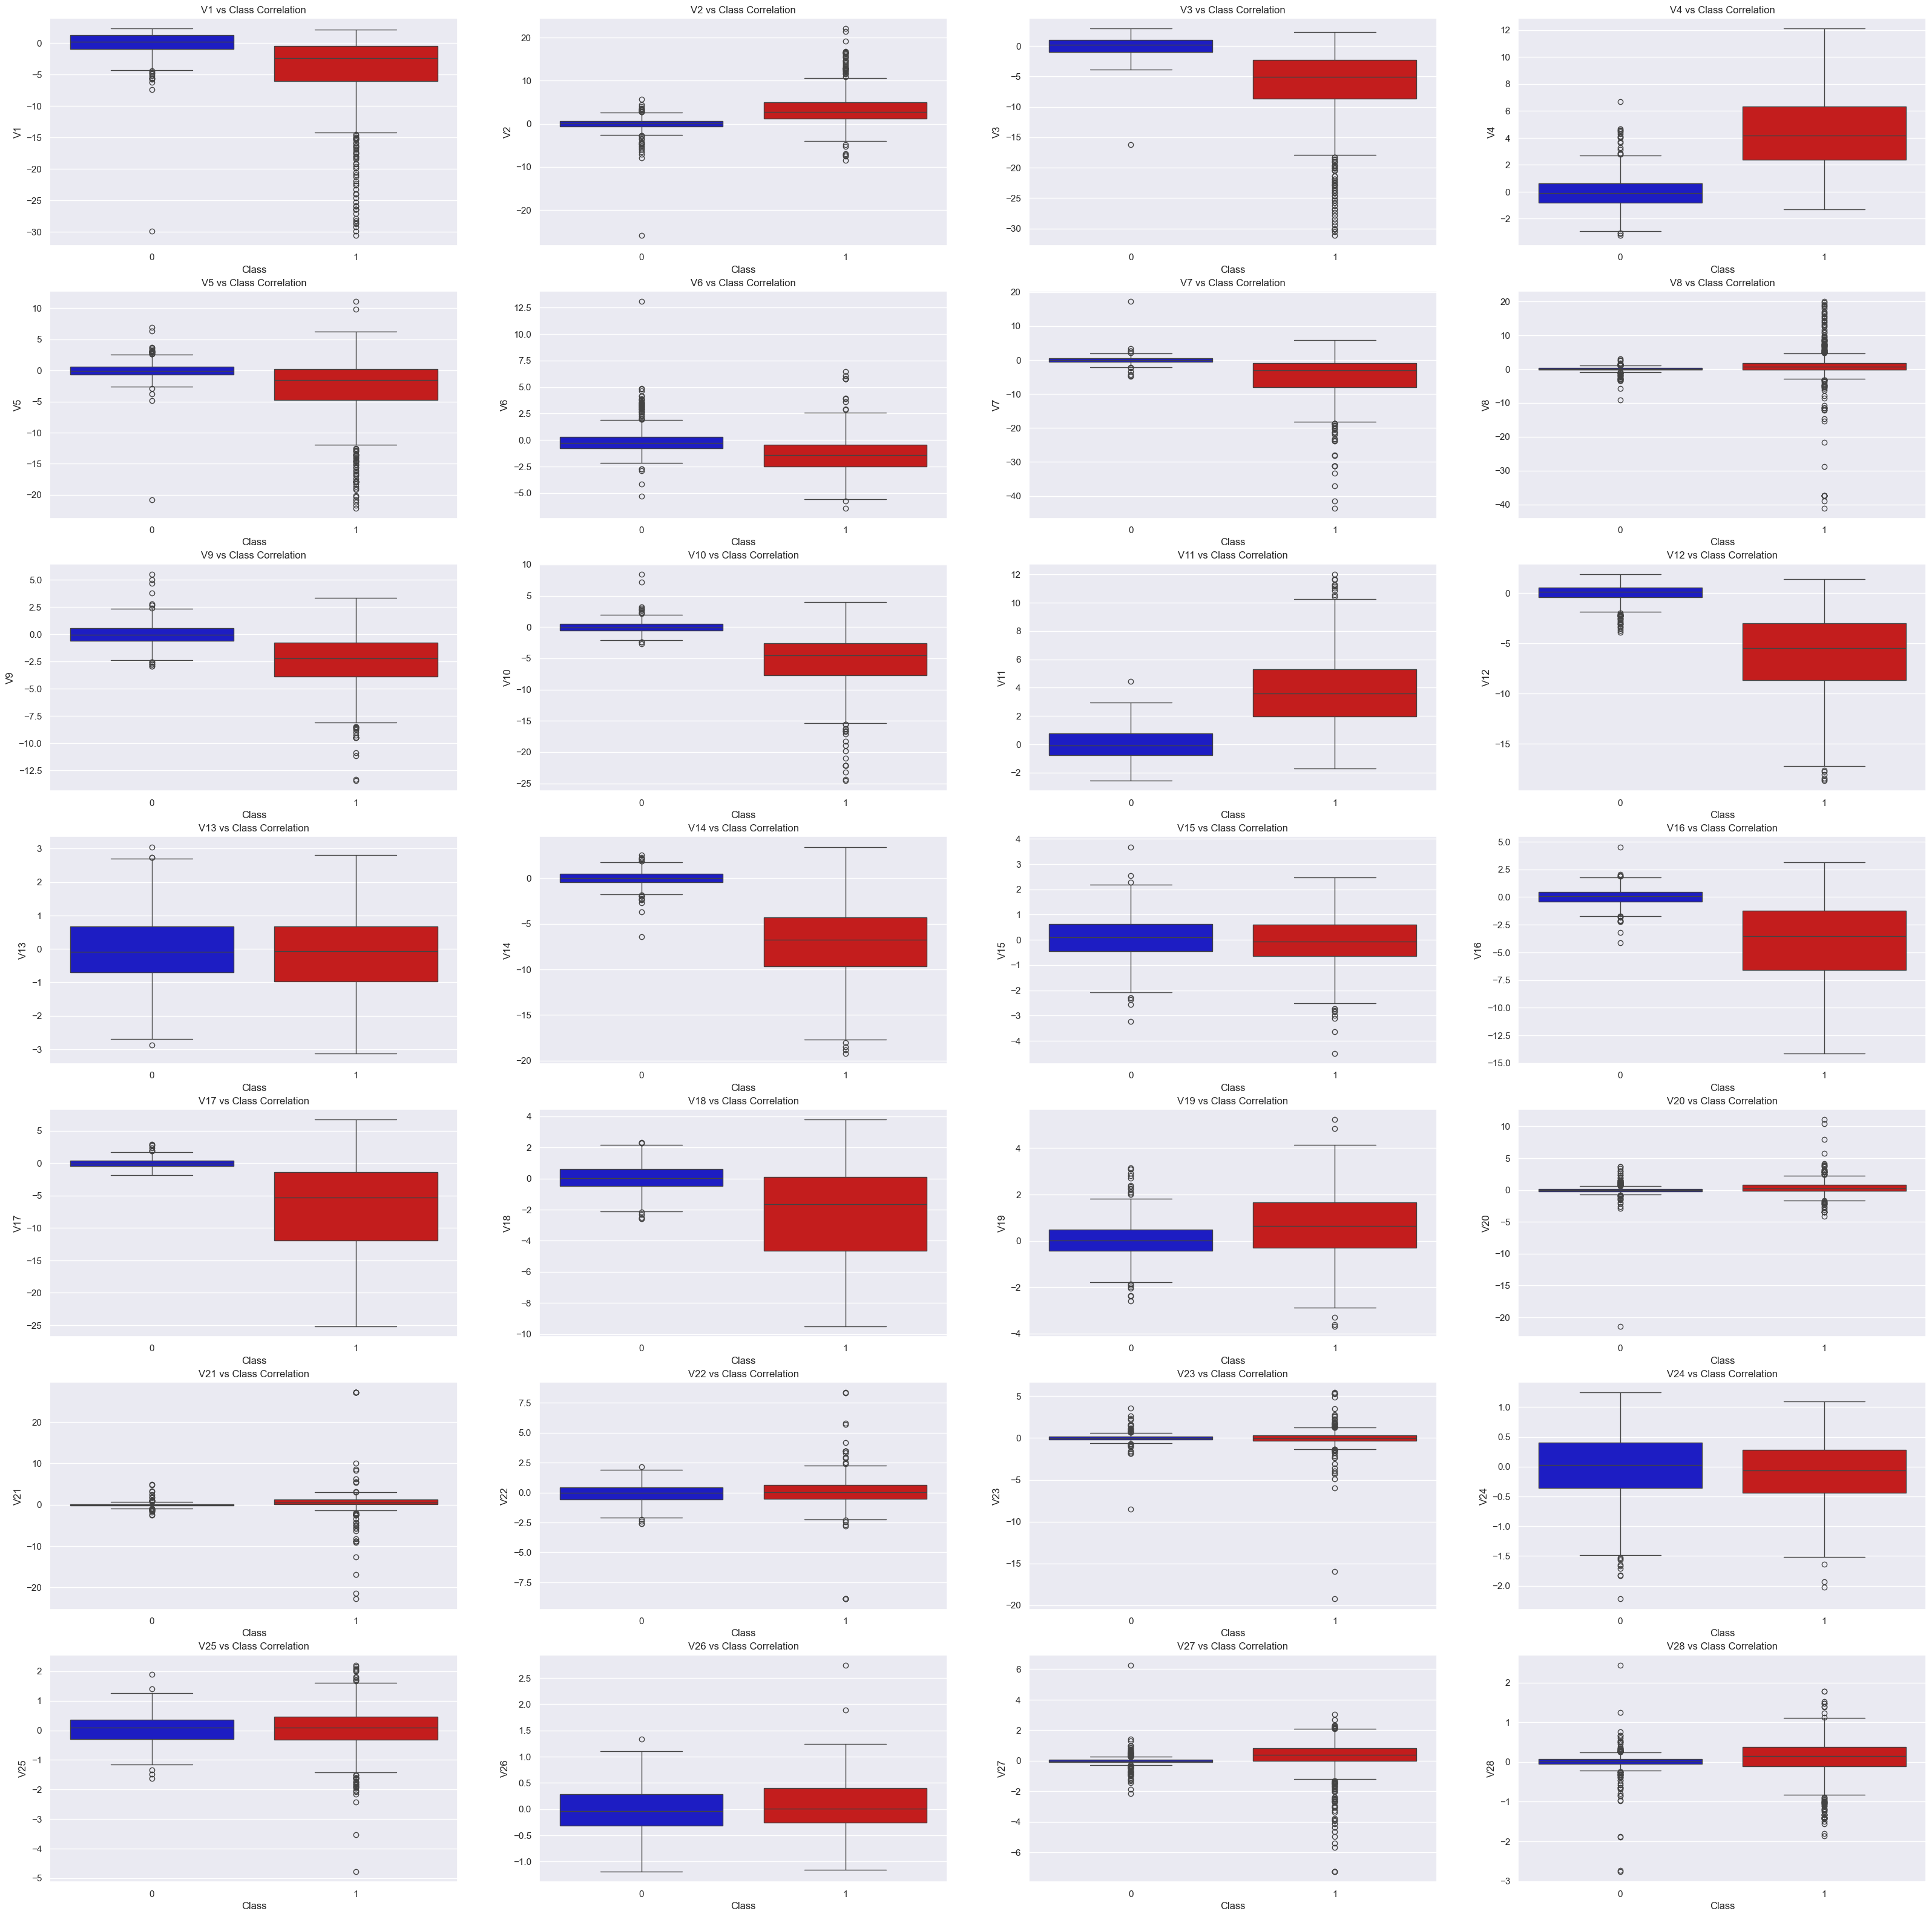

In [ ]:
# Boxplot before removing outliers
f, axes = plt.subplots(7, 4, figsize=(40,40))

axes_y = 0

for column in range(1, 30):
    i, j = divmod(axes_y, 4)

    if i == 7:
        break

    sns.boxplot(x="Class", y="V" + str(column), data=new_df, palette=colors, ax=axes[i, j])
    axes[i, j].set_title(f'V{column} vs Class Correlation')
    axes_y += 1

plt.show()

In [ ]:
# Removing outliers using IQR method
for i in range(1, 29):
    outlires_fraud = new_df['V' + str(i)].loc[new_df['Class'] == 1].values
    q25, q75 = np.percentile(outlires_fraud, 25), np.percentile(outlires_fraud, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    outliers_iqr = q75 - q25
    print('iqr: {}'.format(outliers_iqr))

    outliers_cut_off = outliers_iqr * 1.5
    outliers_lower, outliers_upper = q25 - outliers_cut_off, q75 + outliers_cut_off
    print('Cut Off: {}'.format(outliers_cut_off))
    print(f'V{str(i)} Lower: {outliers_lower}')
    print(f'V{str(i)} Upper: {outliers_upper}')

    outliers = [x for x in outlires_fraud if x < outliers_lower or x > outliers_upper]
    print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
    print(f'V{str(i)} outliers:{outliers}')

    new_df = new_df.drop(new_df[(new_df['V' + str(i)] > outliers_upper) | (new_df['V' + str(i)] < outliers_lower)].index)
    print('----' * 44)

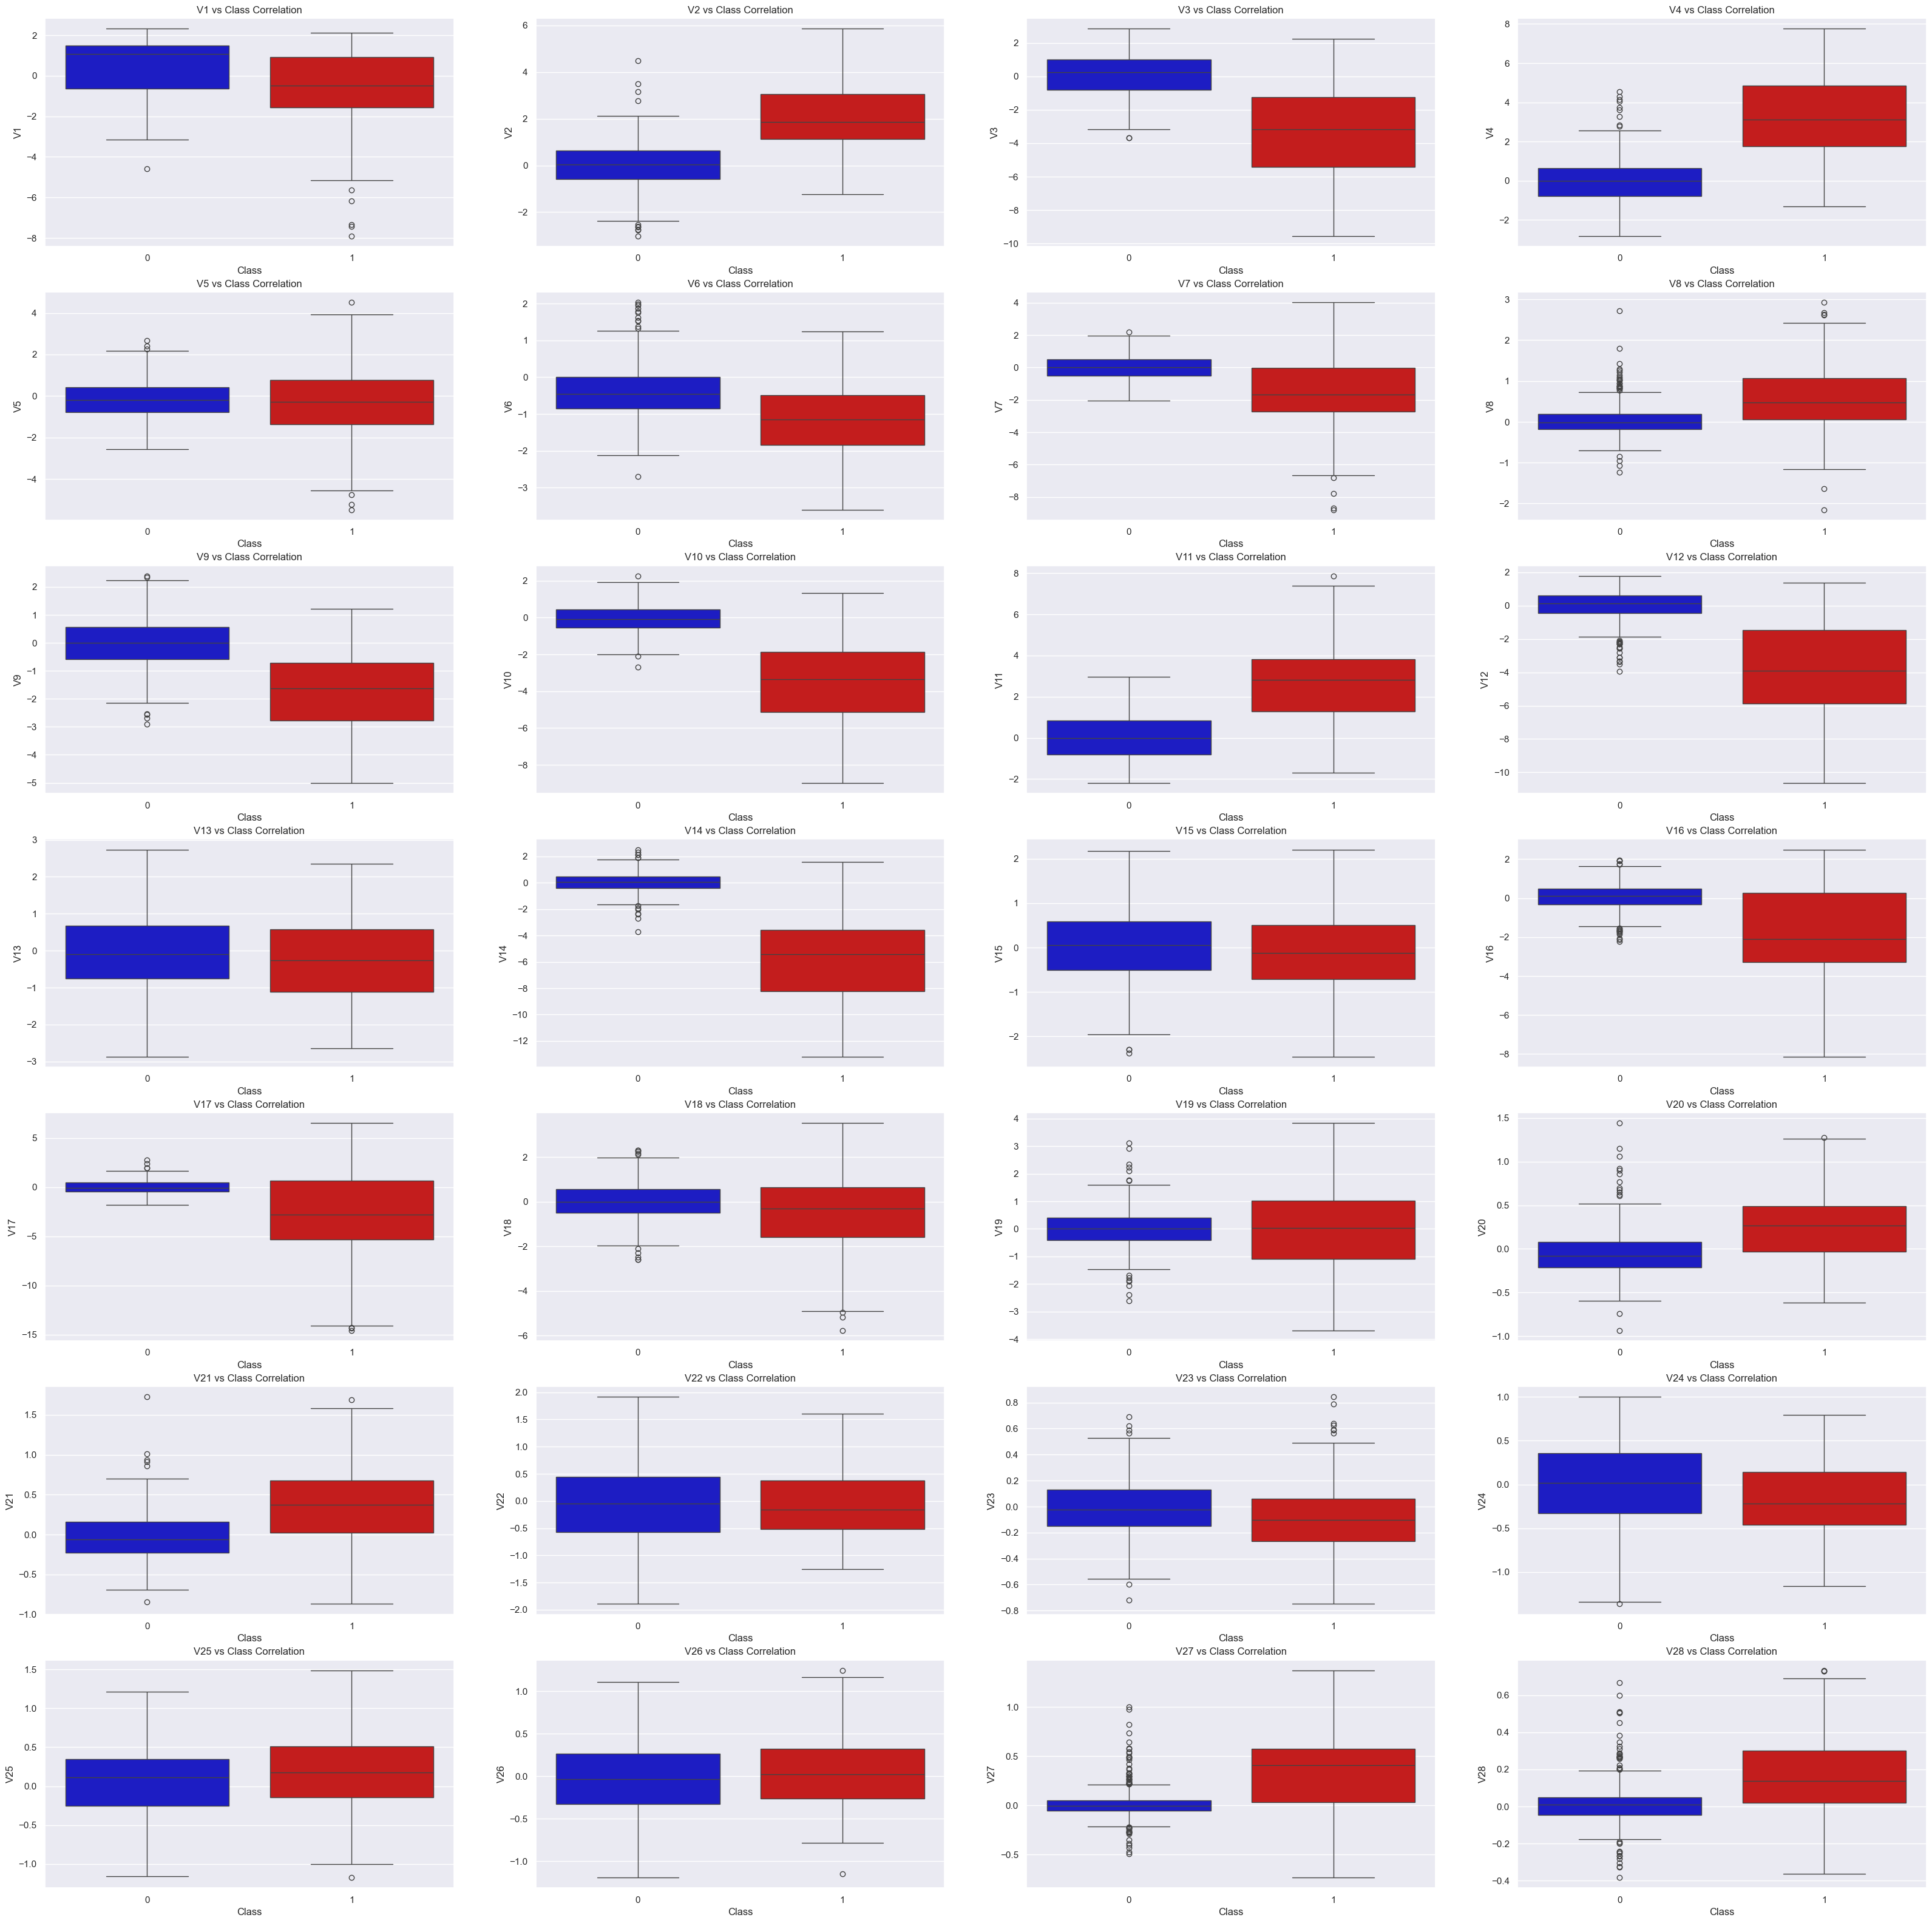

In [ ]:
# Boxplot after removing outliers
f, axes = plt.subplots(7, 4, figsize=(40,40))

axes_y = 0

for column in range(1, 30):
    i, j = divmod(axes_y, 4)

    if i == 7:
        break
    
    sns.boxplot(x="Class", y="V" + str(column), data=new_df, palette=colors, ax=axes[i, j])
    axes[i, j].set_title(f'V{column} vs Class Correlation')
    axes_y += 1

plt.show()

In [ ]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [ ]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [ ]:
# Let's implement simple classifiers
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "Support Vector Classifier": SVC(),
    "RandomForestClassifier": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

In [ ]:
# Accurecy without outliers
from sklearn.model_selection import cross_val_score

final_results_no_outliers = []
all_classifier_no_outliers = []

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "has a training score of", round(training_score.mean() * 100, 2), "% accuracy score")
    final_results_no_outliers.append(round(training_score.mean() * 100, 2))
    all_classifier_no_outliers.append(classifier)

Classifiers:  LogisticRegression has a training score of 92.31 % accuracy score
Classifiers:  SVC has a training score of 93.6 % accuracy score
Classifiers:  RandomForestClassifier has a training score of 93.38 % accuracy score
Classifiers:  XGBClassifier has a training score of 92.31 % accuracy score
Classifiers:  AdaBoostClassifier has a training score of 91.89 % accuracy score


In [ ]:
final_results_single_no_outliers = np.array(final_results_no_outliers)
final_results_single_no_outliers

array([92.31, 93.6 , 93.38, 92.31, 91.89])

In [ ]:
final_results_single_df_no_outleirs = pd.DataFrame({'Accuracy with no outliers':final_results_single_no_outliers}, index=classifiers)
final_results_single_df_no_outleirs

,Accuracy with no outliers
LogisiticRegression,92.31
Support Vector Classifier,93.60
RandomForestClassifier,93.38
XGBoost,92.31
AdaBoost,91.89


In [ ]:
final_results_single_df

,Accuracy
LogisiticRegression,94.54
Support Vector Classifier,93.77
RandomForestClassifier,94.41
XGBoost,94.41
AdaBoost,93.40
